# <center>Econometric analysis - microeconometrics</center>



In [17]:
import numpy as np
import pandas as pd
from patsy import dmatrices
import matplotlib.pyplot as plt
import scipy as stats
import math


import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.iolib.summary2 import summary_col
import csv
from linearmodels.iv import IV2SLS
from statsmodels.api import add_constant
from linearmodels.iv.results import compare
from statsmodels.discrete.discrete_model import Probit,Logit
from scipy.stats import norm
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from linearmodels import PooledOLS, FirstDifferenceOLS, RandomEffects, PanelOLS
from linearmodels.panel import compare


import warnings
warnings.filterwarnings('ignore') 

In [18]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
df = pd.read_csv('group8.csv')
df.shape

(540, 30)

## <span style="color:Lime">==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== </span>

In [20]:
df.isnull().sum()

county       0
year         0
crmrte       0
prbarr       0
prbconv      0
prbpris      0
avgsen       0
polpc        0
density      0
taxpc        0
west         0
central      0
urban        0
pctmin80     0
d82          0
d83          0
d84          0
d85          0
d86          0
d87          0
lcrmrte      0
lprbarr      0
lprbconv     0
lprbpris     0
lavgsen      0
lpolpc       0
ldensity     0
ltaxpc       0
lpctmin      0
lcrmrte_1    0
dtype: int64

In [21]:
types_of_variables = df.dtypes.reset_index()
types_of_variables.columns = ["Variables", "Type"]
print(types_of_variables)

    Variables     Type
0      county    int64
1        year    int64
2      crmrte  float64
3      prbarr  float64
4     prbconv  float64
5     prbpris  float64
6      avgsen  float64
7       polpc  float64
8     density  float64
9       taxpc  float64
10       west    int64
11    central    int64
12      urban    int64
13   pctmin80  float64
14        d82    int64
15        d83    int64
16        d84    int64
17        d85    int64
18        d86    int64
19        d87    int64
20    lcrmrte  float64
21    lprbarr  float64
22   lprbconv  float64
23   lprbpris  float64
24    lavgsen  float64
25     lpolpc  float64
26   ldensity  float64
27     ltaxpc  float64
28    lpctmin  float64
29  lcrmrte_1  float64


In [22]:
df.describe().drop(index=['count'], columns=['county', 'year', 'west', 'central', 'urban', 'd82', 'd83', 'd84', 'd85', 'd86', 'd87'])

,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,pctmin80,lcrmrte,lprbarr,lprbconv,lprbpris,lavgsen,lpolpc,ldensity,ltaxpc,lpctmin,lcrmrte_1
mean,0.031394,0.308753,0.680671,0.424079,8.675870,0.001949,1.394022,31.279776,25.712852,-3.618477,-1.271268,-0.685105,-0.882451,2.126244,-6.483071,-0.010483,3.392820,2.913361,-3.620475
std,0.018308,0.177581,1.703965,0.087747,2.379961,0.002882,1.449843,11.646730,16.905776,0.578133,0.415373,0.597055,0.232575,0.258838,0.530709,0.774905,0.299185,0.954741,0.576443
min,0.001812,0.059524,0.068376,0.148936,4.220000,0.000459,0.199620,14.766344,1.283650,-6.313550,-2.821379,-2.682732,-1.904239,1.439835,-7.687507,-1.611341,2.692351,0.249708,-6.313550
25%,0.017913,0.219829,0.352644,0.372482,6.995000,0.001194,0.535198,24.679556,10.004600,-4.022237,-1.514905,-1.042298,-0.987567,1.945195,-6.730254,-0.625119,3.205975,2.303045,-4.012471
50%,0.027844,0.279900,0.479063,0.428122,8.255000,0.001454,0.958071,28.944574,24.851550,-3.581126,-1.273323,-0.735928,-0.848348,2.110819,-6.533444,-0.042843,3.365383,3.212684,-3.571983
75%,0.038365,0.352635,0.640375,0.482902,9.900000,0.001815,1.510506,34.168085,38.223000,-3.260604,-1.042321,-0.445701,-0.727941,2.292535,-6.311496,0.412445,3.531292,3.643437,-3.261658
max,0.163835,2.750000,37.000000,0.678571,20.980000,0.035578,8.827652,119.761450,64.348198,-1.808895,1.011601,3.610918,-0.387766,3.043570,-3.336024,2.177889,4.785502,4.164309,-1.808895


In [23]:
df.groupby(['year']).describe().drop(columns=['county', 'west', 'central', 'urban', 'd82', 'd83', 'd84', 'd85', 'd86', 'd87'])

crmrte                                                                       prbarr                                                                       prbconv                                                                       prbpris                                                                       avgsen                                                              polpc                                                                       density                                                                       taxpc                                                                               pctmin80                                                                         lcrmrte                                                                       lprbarr                                                                       lprbconv                                                                       lprbpris                                                    \
      count      mean       std       min       25%       50%       75%       max  count      mean       std       min       25%       50%       75%       max   count      mean       std       min       25%       50%       75%       max   count      mean       std       min       25%       50%       75%       max  count      mean       std   min     25%    50%      75%        max count      mean       std       min       25%       50%       75%       max   count      mean       std       min       25%       50%       75%       max count       mean        std        min        25%        50%        75%         max    count       mean        std      min      25%       50%        75%        max   count      mean       std       min       25%       50%       75%       max   count      mean       std       min       25%       50%       75%       max    count      mean       std       min       25%       50%       75%       max    count      mean       std       min       25%       50%   
year                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
82     90.0  0.032648  0.017132  0.003660  0.019883  0.030008  0.039961  0.089035   90.0  0.311571  0.153503  0.137099  0.215260  0.277550  0.361989  1.071430    90.0  0.548633  0.406250  0.141509  0.355222  0.467510  0.608919   3.06667    90.0  0.434310  0.095356  0.168831  0.372030  0.441176  0.499413  0.644493   90.0  8.398222  2.258939  4.32  6.8525  8.255   9.4750  16.850000  90.0  0.001697  0.001794  0.000459  0.001115  0.001374  0.001719  0.012809    90.0  1.352306  1.402062  0.199620  0.529790  0.927673  1.481827  7.952651  90.0  25.608512   7.940480  14.766344  20.499220  23.682153  28.921910   56.802685     90.0  25.712852  16.984738  1.28365  10.0244  24.85155  38.182575  64.348198    90.0 -3.558503  0.544684 -5.610388 -3.917906 -3.506418 -3.220134 -2.418724    90.0 -1.254362  0.402440 -1.987052 -1.535971 -1.281759 -1.016217  0.068994     90.0 -0.754195  0.515995 -1.955392 -1.035022 -0.760335 -0.496385  1.120592     90.0 -0.860951  0.243393 -1.778857 -0.988780 -0.818311   
83     90

# Table version

In [24]:
crm_west = df[df['west']==1].groupby(['year']).mean()['crmrte'] # mean crime rate for west area from 82 to 87 
crm_central = df[df['central']==1].groupby(['year']).mean()['crmrte'] # mean crime rate for central area from 82 to 87
crm_east = df[df['central']==0][df['west']==0].groupby(['year']).mean()['crmrte'] # mean crime rate for east area from 82 to 87
crm_total = df.groupby(['year']).mean()['crmrte'] # mean crime rate for whole area from 82 to 87
table_by_location = pd.concat([crm_west, crm_central, crm_east, crm_total], axis=1, keys=["crime_rate_west", "crime_rate_central", "crime_rate_east", "crime_rate_total"])
print(table_by_location)

      crime_rate_west  crime_rate_central  crime_rate_east  crime_rate_total
year                                                                        
82           0.020832            0.037578         0.034949          0.032648
83           0.019627            0.034524         0.033649          0.030708
84           0.018599            0.032912         0.032602          0.029452
85           0.019020            0.033605         0.032467          0.029759
86           0.019335            0.035260         0.037168          0.032286
87           0.020561            0.037508         0.037395          0.033510


# Graph version

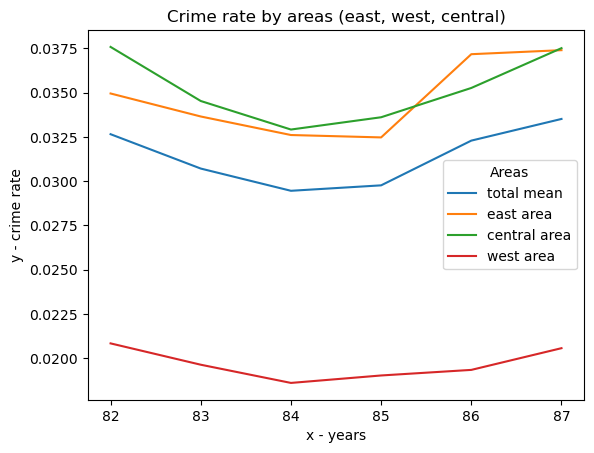

In [25]:
# matplotlib code
plt.plot(crm_total, label="total mean")
plt.plot(crm_east, label="east area")
plt.plot(crm_central, label="central area")
plt.plot(crm_west, label="west area")
plt.xlabel('x - years')
plt.ylabel('y - crime rate')
plt.title('Crime rate by areas (east, west, central)')
plt.legend(title='Areas')

# Table version

In [26]:
crm_urban = df[df['urban']==1].groupby(['year']).mean()['crmrte']
crm_rural = df[df['urban']==0].groupby(['year']).mean()['crmrte']
table_by_urbanization = pd.concat([crm_urban, crm_rural, crm_total], axis=1, keys=["crime_rate_urban", "crime_rate_rural", "crime_rate_total"]) 
print(table_by_urbanization)

      crime_rate_urban  crime_rate_rural  crime_rate_total
year                                                      
82            0.065679          0.029426          0.032648
83            0.060602          0.027791          0.030708
84            0.059017          0.026567          0.029452
85            0.061204          0.026692          0.029759
86            0.064844          0.029110          0.032286
87            0.070494          0.029902          0.033510


# Graph version

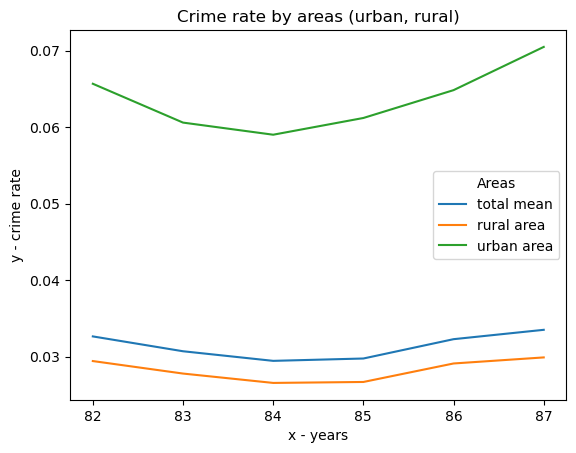

In [27]:
# matplotlib code
plt.plot(crm_total, label="total mean")
plt.plot(crm_rural, label="rural area")
plt.plot(crm_urban, label="urban area")
plt.xlabel('x - years')
plt.ylabel('y - crime rate')
plt.title('Crime rate by areas (urban, rural)')
plt.legend(title='Areas')

# Additional analysis

In [28]:
df.groupby('urban')['crmrte'].describe()

,count,mean,std,min,25%,50%,75%,max
urban,,,,,,,,
0,492.0,0.028248,0.015255,0.001812,0.017183,0.026501,0.034733,0.163835
1,48.0,0.063640,0.015731,0.036607,0.052299,0.060934,0.074490,0.098966


In [29]:
df.groupby(['west', 'central'])['crmrte'].describe()

count      mean       std       min       25%       50%       75%       max
west central                                                                             
0    0        210.0  0.034705  0.019305  0.010655  0.021161  0.030487  0.043993  0.163835
     1        204.0  0.035231  0.018608  0.004582  0.022232  0.030731  0.047297  0.098966
1    0        126.0  0.019663  0.008872  0.001812  0.013391  0.017629  0.026417  0.044164

## <span style="color:Lime">==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== </span>

In [30]:
df_85 = df[df['year']==85] # extracting the data for 1985 only
df_85 = df_85.reset_index().drop(['index', 'year'], axis=1) # since we have extracted the data for only 1985, we do not need the columns index and year
df_85.head(10) # to show the data for 1985

,county,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,west,central,urban,pctmin80,d82,d83,d84,d85,d86,d87,lcrmrte,lprbarr,lprbconv,lprbpris,lavgsen,lpolpc,ldensity,ltaxpc,lpctmin,lcrmrte_1
0,1,0.036573,0.325395,0.578723,0.497059,6.550000,0.001924,2.364896,28.140337,0,1,0,20.218700,0,0,0,1,0,0,-3.308445,-1.122715,-0.546931,-0.699047,1.879465,-6.253162,0.860734,3.337204,3.006608,-3.360269
1,3,0.012035,0.206897,0.909091,0.366667,8.590000,0.000641,1.030888,24.036367,0,1,0,7.916320,0,0,0,1,0,0,-4.419970,-1.575534,-0.095310,-1.003301,2.150599,-7.351951,0.030421,3.179568,2.068926,-4.293130
2,5,0.012475,0.603960,0.180328,0.545455,10.040000,0.001482,0.412766,27.503681,1,0,0,3.160530,0,0,0,1,0,0,-4.384005,-0.504247,-1.712978,-0.606135,2.306577,-6.514221,-0.884875,3.314320,1.150740,-4.280922
3,7,0.024585,0.380655,0.381148,0.483871,11.360000,0.001534,0.493433,47.009041,0,1,0,47.916100,0,0,0,1,0,0,-3.705627,-0.965862,-0.964567,-0.725937,2.430098,-6.479779,-0.706367,3.850340,3.869451,-3.801224
4,9,0.013317,0.393548,0.622951,0.407895,9.229999,0.000902,0.549296,25.173290,1,0,0,1.796190,0,0,0,1,0,0,-4.318691,-0.932552,-0.473287,-0.896745,2.222459,-7.010741,-0.599118,3.225784,0.585668,-4.245665
5,11,0.014119,0.530806,0.455357,0.274510,7.850000,0.002476,0.607287,31.623087,1,0,0,1.540700,0,0,0,1,0,0,-4.260206,-0.633359,-0.786674,-1.292768,2.060513,-6.001147,-0.498753,3.453887,0.432237,-4.086126
6,13,0.034979,0.298962,0.381944,0.454545,7.320000,0.001356,0.524213,29.297892,0,0,0,32.179401,0,0,0,1,0,0,-3.353019,-1.207439,-0.962481,-0.788458,1.990610,-6.603533,-0.645857,3.377516,3.471327,-3.502327
7,15,0.016013,0.423977,0.565517,0.475610,16.680000,0.000890,0.305278,67.581573,0,0,0,61.054001,0,0,0,1,0,0,-4.134323,-0.858076,-0.570015,-0.743157,2.814210,-7.024693,-1.186532,4.213336,4.111759,-4.113772
8,17,0.019696,0.464463,0.306050,0.453488,9.690000,0.001367,0.350398,30.732380,0,0,0,40.389000,0,0,0,1,0,0,-3.927345,-0.766873,-1.184007,-0.790786,2.271094,-6.594902,-1.048685,3.425317,3.698557,-4.021414
9,19,0.012851,0.291667,1.220780,0.356383,7.850000,0.001874,0.530233,74.154984,0,0,0,24.311701,0,0,0,1,0,0,-4.354326,-1.232142,0.199490,-1.031749,2.060513,-6.279616,-0.634440,4.306157,3.190958,-4.291382


In [31]:
# OLS model with endogenous variable lcrmtre 
y, x = dmatrices('lcrmrte ~ lprbarr + lprbconv + lprbpris + lavgsen + lpolpc', data=df_85, return_type='dataframe')

model = sm.OLS(y, x).fit(cov_type='HC0')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lcrmrte   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     35.87
Date:                Fri, 16 Feb 2024   Prob (F-statistic):           1.75e-19
Time:                        18:34:12   Log-Likelihood:                -44.069
No. Observations:                  90   AIC:                             100.1
Df Residuals:                      84   BIC:                             115.1
Df Model:                           5                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3999      0.944     -2.542      0.011      -4.250      -0.549
lprbarr       -0.8426      0.135     -6.244      0.000      -1.107      -0.578
lprbconv      -0.5112      0.057     -8.922      0.000      -0.624      -0.399
lprbpris       0.1702      0.291      0.585      0.558      -0.400       0.740
lavgsen       -0.0376      0.209     -0.180      0.857      -0.447       0.372
lpolpc         0.3760      0.139      2.715      0.007       0.105       0.647
==============================================================================
Omnibus:                       37.897   Durbin-Watson:                   1.537
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.091
Skew:                          -1.318   Prob(JB):                     3.42e-29
Kurtosis:                       8.292   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

## <span style="color:Lime">==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== </span>

In [32]:
# OLS model without any controls with lcrmtre as an endogenous
y, x = dmatrices('lcrmrte ~ lprbarr + lprbconv + lprbpris + lavgsen + lpolpc', data=df_85, return_type='dataframe')

model = sm.OLS(y, x).fit(cov_type='HC0')


# OLS model with controls on the area indicators with lcrmtre as an endogenous
y, x = dmatrices('lcrmrte ~ lprbarr + lprbconv + lprbpris + lavgsen + lpolpc + west + central + urban', data=df_85, return_type='dataframe')

modelR_area = sm.OLS(y, x).fit(cov_type='HC0')


# OLS model with controls on the county characteristics with lcrmtre as an endogenous
y, x = dmatrices('lcrmrte ~ lprbarr + lprbconv + lprbpris + lavgsen + lpolpc + ldensity + ltaxpc + lpctmin', data=df_85, return_type='dataframe')

modelR_char = sm.OLS(y, x).fit(cov_type='HC0')


# OLS model with controls on the county characteristics and area indicators with lcrmtre as an endogenous
y, x = dmatrices('lcrmrte ~ lprbarr + lprbconv + lprbpris + lavgsen + lpolpc + ldensity + ltaxpc + lpctmin + west + central + urban', data=df_85, return_type='dataframe')
modelR = sm.OLS(y, x).fit(cov_type='HC0')


# comparison of results
summary_col([model, modelR_area, modelR_char, modelR],stars=True,float_format='%0.4f',
                  model_names=['restricted\n(0)', 'unrestricted_by_area\n(1)', 'unrestricted_by_char\n(2)', 'unrestricted\n(3)'],
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs))},
                  regressor_order=['lcrmrte', 'lprbarr', 'lprbconv', 'lprbpris', 'lavgsen', 'lpolpc', 'ldensity', 'ltaxpc', 'lpctmin', 'west', 'central', 'urban'])

,restricted,unrestricted_by_area,unrestricted_by_char,unrestricted
,(0),(1),(2),(3)
lprbarr,-0.8426***,-0.7756***,-0.5579***,-0.5602***
,(0.1349),(0.0940),(0.1332),(0.1139)
lprbconv,-0.5112***,-0.5090***,-0.4446***,-0.4314***
,(0.0573),(0.0479),(0.0751),(0.0688)
lprbpris,0.1702,-0.0824,-0.3318,-0.2921
,(0.2908),(0.2472),(0.2536),(0.2256)
lavgsen,-0.0376,-0.0722,-0.0419,-0.0203
,(0.2088),(0.1739),(0.1602),(0.1452)
lpolpc,0.3760***,0.3789***,0.3659***,0.3775***


## <span style="color:Lime">==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== </span>

In [33]:
Fstat_char = ((modelR.rsquared - modelR_area.rsquared)/3)/((1 - modelR.rsquared)/(model.nobs-9))
pvalue_char = 1 - stats.stats.f.cdf(Fstat_char, 3, (model.nobs-9))
print(f'Fstat for all additional indicators combined is equal to {Fstat_char} and p-value is equal to {pvalue_char:.20f}')
print('\n')

Fstat_area = ((modelR.rsquared - modelR_char.rsquared)/3)/((1 - modelR.rsquared)/(model.nobs-9))
pvalue_area = 1 - stats.stats.f.cdf(Fstat_area, 3, (model.nobs-9))
print(f'Fstat for all additional indicators combined is equal to {Fstat_area} and p-value is equal to {pvalue_area:.20f}')

Fstat for all additional indicators combined is equal to 9.373975696792037 and p-value is equal to 0.00002179254357814742


Fstat for all additional indicators combined is equal to 3.4647689244286823 and p-value is equal to 0.01998630039854465412


## <span style="color:Lime">==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== </span>

In [34]:
# extracting the lcrmrte data for 1984
crime_rate_for_1984 = df[df['year']==84][['lcrmrte']].reset_index().drop(['index'], axis=1)

# joining the data crime_rate_for_1984 as an additional column to the data for 1985
df_85 = df_85.join(crime_rate_for_1984, rsuffix='_84') 


df_85.head(10)

,county,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,west,central,urban,pctmin80,d82,d83,d84,d85,d86,d87,lcrmrte,lprbarr,lprbconv,lprbpris,lavgsen,lpolpc,ldensity,ltaxpc,lpctmin,lcrmrte_1,lcrmrte_84
0,1,0.036573,0.325395,0.578723,0.497059,6.550000,0.001924,2.364896,28.140337,0,1,0,20.218700,0,0,0,1,0,0,-3.308445,-1.122715,-0.546931,-0.699047,1.879465,-6.253162,0.860734,3.337204,3.006608,-3.360269,-3.360269
1,3,0.012035,0.206897,0.909091,0.366667,8.590000,0.000641,1.030888,24.036367,0,1,0,7.916320,0,0,0,1,0,0,-4.419970,-1.575534,-0.095310,-1.003301,2.150599,-7.351951,0.030421,3.179568,2.068926,-4.293130,-4.293130
2,5,0.012475,0.603960,0.180328,0.545455,10.040000,0.001482,0.412766,27.503681,1,0,0,3.160530,0,0,0,1,0,0,-4.384005,-0.504247,-1.712978,-0.606135,2.306577,-6.514221,-0.884875,3.314320,1.150740,-4.280922,-4.280922
3,7,0.024585,0.380655,0.381148,0.483871,11.360000,0.001534,0.493433,47.009041,0,1,0,47.916100,0,0,0,1,0,0,-3.705627,-0.965862,-0.964567,-0.725937,2.430098,-6.479779,-0.706367,3.850340,3.869451,-3.801224,-3.801224
4,9,0.013317,0.393548,0.622951,0.407895,9.229999,0.000902,0.549296,25.173290,1,0,0,1.796190,0,0,0,1,0,0,-4.318691,-0.932552,-0.473287,-0.896745,2.222459,-7.010741,-0.599118,3.225784,0.585668,-4.245665,-4.245665
5,11,0.014119,0.530806,0.455357,0.274510,7.850000,0.002476,0.607287,31.623087,1,0,0,1.540700,0,0,0,1,0,0,-4.260206,-0.633359,-0.786674,-1.292768,2.060513,-6.001147,-0.498753,3.453887,0.432237,-4.086126,-4.086126
6,13,0.034979,0.298962,0.381944,0.454545,7.320000,0.001356,0.524213,29.297892,0,0,0,32.179401,0,0,0,1,0,0,-3.353019,-1.207439,-0.962481,-0.788458,1.990610,-6.603533,-0.645857,3.377516,3.471327,-3.502327,-3.502327
7,15,0.016013,0.423977,0.565517,0.475610,16.680000,0.000890,0.305278,67.581573,0,0,0,61.054001,0,0,0,1,0,0,-4.134323,-0.858076,-0.570015,-0.743157,2.814210,-7.024693,-1.186532,4.213336,4.111759,-4.113772,-4.113772
8,17,0.019696,0.464463,0.306050,0.453488,9.690000,0.001367,0.350398,30.732380,0,0,0,40.389000,0,0,0,1,0,0,-3.927345,-0.766873,-1.184007,-0.790786,2.271094,-6.594902,-1.048685,3.425317,3.698557,-4.021414,-4.021414
9,19,0.012851,0.291667,1.220780,0.356383,7.850000,0.001874,0.530233,74.154984,0,0,0,24.311701,0,0,0,1,0,0,-4.354326,-1.232142,0.199490,-1.031749,2.060513,-6.279616,-0.634440,4.306157,3.190958,-4.291382,-4.291382


In [19]:
# OLS model with endogenous variable lcrmtre and controller lcrmrte_84 
y, x = dmatrices('lcrmrte ~ lprbarr + lprbconv + lprbpris + lavgsen + lpolpc + ldensity + ltaxpc + lpctmin + west + central + urban + lcrmrte_84', data=df_85, return_type='dataframe')

modelR_with_lcrmtre_84 = sm.OLS(y, x).fit(cov_type='HC0')

modelR_with_lcrmtre_84.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lcrmrte   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     116.9
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           2.99e-44
Time:                        17:08:39   Log-Likelihood:                 32.437
No. Observations:                  90   AIC:                            -38.87
Df Residuals:                      77   BIC:                            -6.376
Df Model:                          12                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0381      0.506     -0.075      0.940      -1.030       0.954
lprbarr       -0.1050      0.091     -1.153      0.249      -0.284       0.073
lprbconv      -0.1763      0.066     -2.669      0.008      -0.306      -0.047
lprbpris      -0.0257      0.113     -0.227      0.820      -0.247       0.196
lavgsen       -0.1365      0.108     -1.263      0.207      -0.348       0.075
lpolpc         0.0938      0.085      1.103      0.270      -0.073       0.260
ldensity       0.0816      0.062      1.323      0.186      -0.039       0.203
ltaxpc        -0.0141      0.080     -0.176      0.860      -0.171       0.143
lpctmin       -0.0453      0.055     -0.826      0.409      -0.153       0.062
west          -0.2241      0.116     -1.938      0.053      -0.451       0.003
central       -0.0689      0.057     -1.212      0.225      -0.180       0.043
urban         -0.0171      0.107     -0.159      0.873      -0.228       0.193
lcrmrte_84     0.7472      0.112      6.657      0.000       0.527       0.967
==============================================================================
Omnibus:                       29.397   Durbin-Watson:                   2.302
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.679
Skew:                          -1.141   Prob(JB):                     7.40e-16
Kurtosis:                       6.657   Cond. No.                         254.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [20]:
summary_col([modelR, modelR_with_lcrmtre_84],stars=True,float_format='%0.4f',
                  model_names=['unrestricted\n(0)', 'unrestricted_with_lcrmrte_84\n(1)'],
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs))},
                  regressor_order=['lcrmrte', 'lprbarr', 'lprbconv', 'lprbpris', 'lavgsen', 'lpolpc', 'ldensity', 'ltaxpc', 'lpctmin', 'west', 'central', 'urban', 'lcrmrte_84'])

,unrestricted,unrestricted_with_lcrmrte_84
,(0),(1)
lprbarr,-0.5602***,-0.1050
,(0.1139),(0.0911)
lprbconv,-0.4314***,-0.1763***
,(0.0688),(0.0661)
lprbpris,-0.2921,-0.0257
,(0.2256),(0.1131)
lavgsen,-0.0203,-0.1365
,(0.1452),(0.1081)
lpolpc,0.3775***,0.0938


In [21]:
correlation = df_85[['lprbarr', 'lprbconv', 'lprbpris', 'lavgsen', 'lpolpc', 'ldensity', 'ltaxpc', 'lpctmin', 'west', 'central', 'urban', 'lcrmrte_84']].corr()
correlation[['lcrmrte_84']]

,lcrmrte_84
lprbarr,-0.505737
lprbconv,-0.245726
lprbpris,0.176913
lavgsen,0.061794
lpolpc,0.155454
ldensity,0.647601
ltaxpc,0.117174
lpctmin,0.376961
west,-0.408647
central,0.184480


## <span style="color:Lime">==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== </span>

In [22]:
# Add a constant to the DataFrame
df = add_constant(df, has_constant="skip")

In [23]:
# specify year as a categorical variable
year = pd.Categorical(df.year)

# Set a MultiIndex for the PanelData object
df = df.set_index(["county", "year"])

# Adding values for the categorical variable 'year'
df["year"] = year

In [24]:
# Specify the exogenous variables
exog_vars = ['const', 'lprbarr', 'lprbconv', 'lprbpris', 'lavgsen', 'lpolpc', 'year']

# Create the exogenous variable DataFrame
exog = df[exog_vars]

# Specify the dependent variable
dep_variable = df['lcrmrte']

# Fit the Pooled OLS model
model_pols = PooledOLS(dep_variable, exog).fit()

# Printing the regression results
print(model_pols)

                          PooledOLS Estimation Summary                          
Dep. Variable:                lcrmrte   R-squared:                        0.5738
Estimator:                  PooledOLS   R-squared (Between):              0.6457
No. Observations:                 540   R-squared (Within):              -0.2565
Date:                Wed, Dec 20 2023   R-squared (Overall):              0.5738
Time:                        17:08:41   Log-likelihood                   -239.55
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      71.227
Entities:                          90   P-value                           0.0000
Avg Obs:                       6.0000   Distribution:                  F(10,529)
Min Obs:                       6.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             71.227
                            

In [25]:
# Fit the Pooled OLS model with clustered standard error
modelPOLS1cluster = PooledOLS(dep_variable, exog).fit(cov_type="clustered", cluster_entity=True)

# Printing the regression results
print(modelPOLS1cluster)

                          PooledOLS Estimation Summary                          
Dep. Variable:                lcrmrte   R-squared:                        0.5738
Estimator:                  PooledOLS   R-squared (Between):              0.6457
No. Observations:                 540   R-squared (Within):              -0.2565
Date:                Wed, Dec 20 2023   R-squared (Overall):              0.5738
Time:                        17:08:42   Log-likelihood                   -239.55
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      71.227
Entities:                          90   P-value                           0.0000
Avg Obs:                       6.0000   Distribution:                  F(10,529)
Min Obs:                       6.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             34.728
                            

In [26]:
out = {"OLS": model_pols, "OLScluster": modelPOLS1cluster}
compare(out,precision='std-errors',stars=False)

,OLS,OLScluster
Dep. Variable,lcrmrte,lcrmrte
Estimator,PooledOLS,PooledOLS
No. Observations,540,540
Cov. Est.,Unadjusted,Clustered
R-squared,0.5738,0.5738
R-Squared (Within),-0.2565,-0.2565
R-Squared (Between),0.6457,0.6457
R-Squared (Overall),0.5738,0.5738
F-statistic,71.227,71.227
P-value (F-stat),0.0000,0.0000


## <span style="color:Lime">==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== </span>

In [27]:
# Fit RandomEffects model
modelRE = RandomEffects(dep_variable, exog).fit()

# Printing the regression results
print(modelRE)

                        RandomEffects Estimation Summary                        
Dep. Variable:                lcrmrte   R-squared:                        0.4263
Estimator:              RandomEffects   R-squared (Between):              0.4340
No. Observations:                 540   R-squared (Within):               0.4236
Date:                Wed, Dec 20 2023   R-squared (Overall):              0.4331
Time:                        17:08:43   Log-likelihood                    281.61
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      39.310
Entities:                          90   P-value                           0.0000
Avg Obs:                       6.0000   Distribution:                  F(10,529)
Min Obs:                       6.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             39.310
                            

In [28]:
# Comparing the two results (Pooled OLS and RandomEffects)

out = {"OLS": model_pols, "OLScluster": modelPOLS1cluster, "RE": modelRE}
compare(out,precision='std-errors',stars=False)

,OLS,OLScluster,RE
Dep. Variable,lcrmrte,lcrmrte,lcrmrte
Estimator,PooledOLS,PooledOLS,RandomEffects
No. Observations,540,540,540
Cov. Est.,Unadjusted,Clustered,Unadjusted
R-squared,0.5738,0.5738,0.4263
R-Squared (Within),-0.2565,-0.2565,0.4236
R-Squared (Between),0.6457,0.6457,0.4340
R-Squared (Overall),0.5738,0.5738,0.4331
F-statistic,71.227,71.227,39.310
P-value (F-stat),0.0000,0.0000,0.0000


## <span style="color:Lime">==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== </span>

# The Hausman Test

In [29]:
# Fit RandomEffects model
modelFE = PanelOLS(dep_variable, exog, entity_effects=True, drop_absorbed=True).fit()

# Printing the regression results
print(modelFE)

                          PanelOLS Estimation Summary                           
Dep. Variable:                lcrmrte   R-squared:                        0.4325
Estimator:                   PanelOLS   R-squared (Between):              0.3787
No. Observations:                 540   R-squared (Within):               0.4325
Date:                Wed, Dec 20 2023   R-squared (Overall):              0.3830
Time:                        17:08:44   Log-likelihood                    366.13
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      33.539
Entities:                          90   P-value                           0.0000
Avg Obs:                       6.0000   Distribution:                  F(10,440)
Min Obs:                       6.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             33.539
                            

In [30]:
out = {"OLS": model_pols, "OLScluster": modelPOLS1cluster, "RE": modelRE, "FE": modelFE}
compare(out,precision='std-errors',stars=False)

,OLS,OLScluster,RE,FE
Dep. Variable,lcrmrte,lcrmrte,lcrmrte,lcrmrte
Estimator,PooledOLS,PooledOLS,RandomEffects,PanelOLS
No. Observations,540,540,540,540
Cov. Est.,Unadjusted,Clustered,Unadjusted,Unadjusted
R-squared,0.5738,0.5738,0.4263,0.4325
R-Squared (Within),-0.2565,-0.2565,0.4236,0.4325
R-Squared (Between),0.6457,0.6457,0.4340,0.3787
R-Squared (Overall),0.5738,0.5738,0.4331,0.3830
F-statistic,71.227,71.227,39.310,33.539
P-value (F-stat),0.0000,0.0000,0.0000,0.0000


In [31]:
## hausman
a = modelFE.cov
b = np.size(modelFE.cov,1)
# do not consider the constant
c = modelFE.cov.iloc[1:,1:]

d = modelRE.cov
# select only the part of the variance-covariance matrix that contains the same regressors included in the FE specification
e = modelRE.cov.iloc[1:np.size(modelFE.cov,1),1:np.size(modelFE.cov,1)]

#compute the test statistic W
psi = modelFE.cov.iloc[1:,1:] - modelRE.cov.iloc[1:np.size(modelFE.cov,1),1:np.size(modelFE.cov,1)]
diff = modelFE.params[1:] - modelRE.params[1:np.size(modelFE.cov,1)]
W = diff.dot(np.linalg.inv(psi)).dot(diff)

# set the degrees of freedom and compute the p-value
dof = np.size(modelFE.cov,1) - 1
pvalue = stats.stats.chi2(dof).sf(W)
print("Hausman Test: chisq = {0}, df = {1}, p-value = {2}".format(W, dof, pvalue))

Hausman Test: chisq = -86.22758397481472, df = 10, p-value = 1.0
